In [1]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import time
import sys,os
%matplotlib inline

In [2]:
np.random.seed(41)
centers = [-np.ones(2), np.ones(2)]

X, y = make_blobs(n_samples=600, n_features=2, cluster_std=1.4,
                  centers=centers, shuffle=True)

Xtest, ytest = make_blobs(n_samples=500, n_features=2, cluster_std=1.4,
                  centers=centers, shuffle=True)


In [3]:
for f in range(30):
    ind=int(np.floor(np.random.rand()*len(X)))
    X=np.vstack([X[:ind],(0.1*(np.random.randn(2))+np.array([24,8])).reshape(1,2),X[ind:]])
    y=np.hstack([y[:ind],[0],y[ind:]])

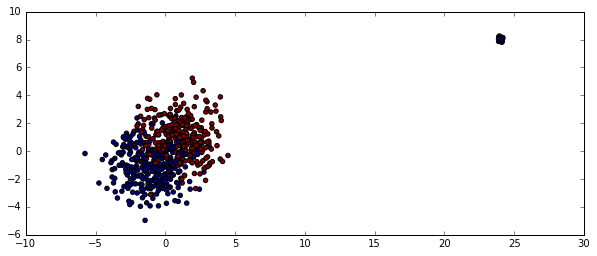

In [4]:
fig=plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
from sklearn.linear_model import Perceptron
per=Perceptron()
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
from sklearn.svm import LinearSVC
svc=LinearSVC()

In [6]:
from linear_model_MOM import perceptronMOM, logregMOM
from kernel_model_MOM import log_kernel_MOM, log_kernel_MOM_fast
from Mestimateur import logreg_mest

# Parameters Perceptron MOM : initial classifier w_0, initial block size K_1, final block size K_T, step-size parameter 
# eta_0, number of epoch T and number of aggregations of the algorithm.
# Parameters Logistic regression MOM : initial classifier w_0, initial block size K_1, final block size K_T, step-size parameter 
# eta_0, regularization parameter \beta, number of epoch T and number of aggregations of the algorithm.
lrMOM=logregMOM([-2,5,1],120,10,0.1,300,agg=1)
# The parameters of KLR MOM : initial block size K_1, final block size K_T, step-size parameter 
# eta_0, regularization parameter \beta, number of epoch T, number of aggregations of the algorithm and kernel parameters.
KLRMOM=log_kernel_MOM(120,10,0.1,300,agg=1,kernel='poly',degree=1)

lrmest=logreg_mest()

In [7]:
def plot_classif(clfs,limPlot,title,shape):
    for i in range(len(clfs)):
        clf=clfs[i]
        plt.subplot(shape[0],shape[1],i+1)
        clf.fit(X,y)
        pred=clf.predict(Xtest)
        xx, yy = np.meshgrid(np.arange(limPlot[0][0], limPlot[0][1], 0.1), np.arange(limPlot[1][0], limPlot[1][1], 0.1))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
        plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest)
        plt.title(title[i]+': '+str(np.mean(ytest==pred)))

In [8]:
fig=plt.figure(figsize=(12, 5), dpi= 80, facecolor='w', edgecolor='k')
classifiers=[lrmest,logreg,svc,perMOM,lrMOM,KLRMOM]
titles=['lrmest','Logistic Regression','Linear SVM','Perceptron MOM','Logistic Regression MOM', 'Linear KLR MOM']
plot_classif(classifiers,[[-10,10],[-10,10]],titles,[2,3])
plt.tight_layout()
plt.show()

NameError: name 'perMOM' is not defined